# Las condiciones iniciales

- Búfalos: $x_0=10,600 $
- Leones: $y_0=500$
- Zebras: $z_0=10,500$

## Enfoque Simplista con Mutualismo

Modelo que describe el comportamiento de las 3 especies (Búfalos, Leones y Zebras):

$$\frac{dx}{dt}=0.405x-0.81xy+0.015xz $$
$$\frac{dy}{dt}=-1.5y+0.125(0.81xy+0.75yz) $$ 
$$\frac{dz}{dt}= 0.34z-0.75yz+0.02xz$$

*Los factores en el módelo de los leones se refieren a la proporción que tienen de convertir en comida la interacción con la otra especie

In [1]:
from scipy.integrate import solve_ivp, odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
tspan=[0,300]
cond_in=[10600,500,10500]

In [9]:
def Modsim(t,X):
    x=X[0]
    y=X[1]
    z=X[2]
    return [0.405*x-0.81*x*y+0.015*x*z, -1.5*y+0.125*(0.81*x*y+0.75*y*z), 0.34*z-0.75*y*z+0.02*x*z]

In [18]:
solsim=solve_ivp(Modsim, tspan, cond_in, max_step=0.1)
solsim

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 21956
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 6.13836512e-04, 1.22767302e-03, ...,
       2.99838942e+02, 2.99938942e+02, 3.00000000e+02])
 t_events: None
        y: array([[1.06000000e+04, 7.21191550e+03, 2.56601283e+03, ...,
        1.18120672e-10, 1.23002754e-10, 1.26082362e-10],
       [5.00000000e+02, 1.51942294e+03, 2.74939520e+03, ...,
        4.06304520e-10, 3.49709543e-10, 3.19103486e-10],
       [1.05000000e+04, 7.59783115e+03, 2.95984230e+03, ...,
        2.70457525e-85, 2.79811192e-85, 2.85680739e-85]])
 y_events: None

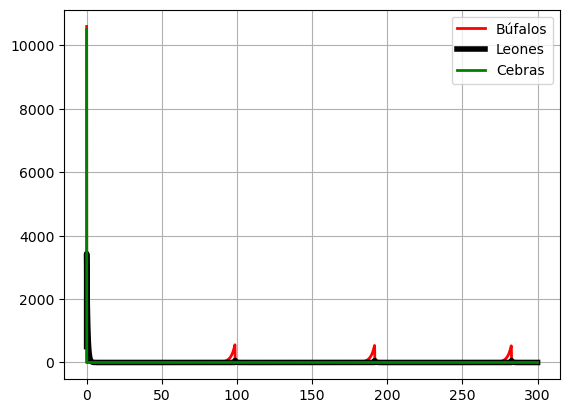

In [19]:
plt.figure()
plt.plot(solsim.t,solsim.y[0], color="r", lw=2, label="Búfalos")
plt.plot(solsim.t,solsim.y[1], color="k", lw=4, label="Leones")
plt.plot(solsim.t,solsim.y[2], color="g", lw=2, label="Cebras")
plt.legend()
plt.grid()

## Enfoque Logístico con Mutualismo

In [26]:
def Modlog(t,X):
    x=X[0]
    y=X[1]
    z=X[2]
    return [0.405*x*(1-(x/12))-0.81*x*y+0.015*x*z, 
            -1.5*y+0.125*(x*y+y*z),
            0.34*z*(1-(z/12))-0.75*y*z+0.02*x*z]

In [20]:
sollog=solve_ivp(Modlog, tspan, cond_in, max_step=0.1)
sollog

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 21794
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 6.31359442e-04, 1.24577525e-03, ...,
       2.99848709e+02, 2.99948709e+02, 3.00000000e+02])
 t_events: None
        y: array([[1.06000000e+04, 5.47278222e+03, 1.47052743e+03, ...,
        1.20000000e+01, 1.20000000e+01, 1.20000000e+01],
       [5.00000000e+02, 1.86167098e+03, 3.13644892e+03, ...,
        2.07140780e-55, 2.07140780e-55, 2.07140780e-55],
       [1.05000000e+04, 5.92601783e+03, 1.76555997e+03, ...,
        2.36911493e-61, 2.51058662e-61, 2.58639572e-61]])
 y_events: None

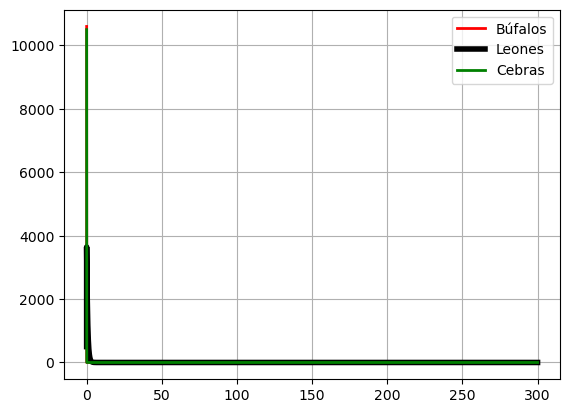

In [24]:
plt.figure()
plt.plot(sollog.t,sollog.y[0], color="r", lw=2, label="Búfalos")
plt.plot(sollog.t,sollog.y[1], color="k", lw=4, label="Leones")
plt.plot(sollog.t,sollog.y[2], color="g", lw=2, label="Cebras")
plt.legend()
plt.grid()

## Combinación de los dos Métodos Anteriores

In [30]:
def Modcom(t,X):
    x=X[0]
    y=X[1]
    z=X[2]
    return [0.405*x-0.81*x*y+0.015*x*z, 
            -1.5*y+(0.125*x*y+0.125*y*z)/(1+0.5*y),
            0.34*z-0.75*y*z+0.02*x*z]

In [31]:
solcom=solve_ivp(Modcom, tspan, cond_in, max_step=0.1)
solcom

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 18542
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 2.60526098e-03, 5.21052196e-03, ...,
       2.99842059e+02, 2.99942059e+02, 3.00000000e+02])
 t_events: None
        y: array([[1.06000000e+04, 5.03082765e+03, 2.00980724e+03, ...,
        7.56140351e+00, 7.56140351e+00, 7.56140351e+00],
       [5.00000000e+02, 5.08237478e+02, 5.11015484e+02, ...,
        6.54970760e-01, 6.54970760e-01, 6.54970760e-01],
       [1.05000000e+04, 5.82547226e+03, 2.55984160e+03, ...,
        8.36842105e+00, 8.36842105e+00, 8.36842105e+00]])
 y_events: None

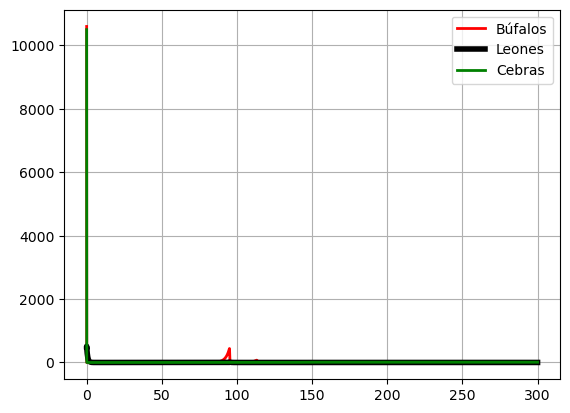

In [32]:
plt.figure()
plt.plot(solcom.t,solcom.y[0], color="r", lw=2, label="Búfalos")
plt.plot(solcom.t,solcom.y[1], color="k", lw=4, label="Leones")
plt.plot(solcom.t,solcom.y[2], color="g", lw=2, label="Cebras")
plt.legend()
plt.grid()